# Python Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
df = sns.load_dataset('titanic')
#df = sns.load_dataset('tips')

In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop unnecessary columns
df = (df.drop(['who','adult_male','alone','parch','deck'
               ,'survived','embark_town','pclass'], axis=1))


## Missing values

In [7]:
df.isnull().sum()

sex           0
age         177
sibsp         0
fare          0
embarked      2
class         0
alive         0
dtype: int64

In [8]:
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

          count  percentage
sex           0        0.00
age         177       19.87
sibsp         0        0.00
fare          0        0.00
embarked      2        0.22
class         0        0.00
alive         0        0.00


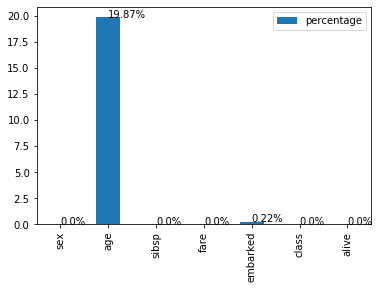

In [9]:
# visualize missing value#
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%' )


In [10]:

# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)

['age', 'sibsp', 'fare']
['sex', 'embarked', 'class', 'alive']


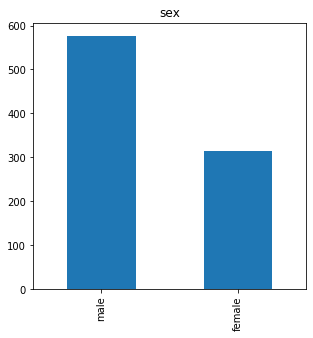

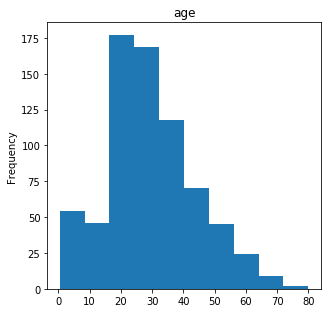

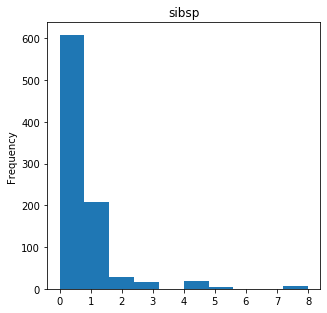

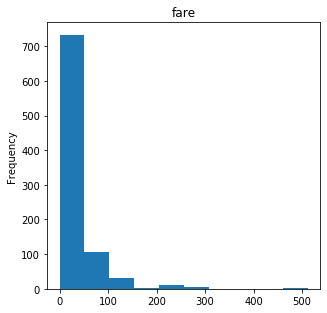

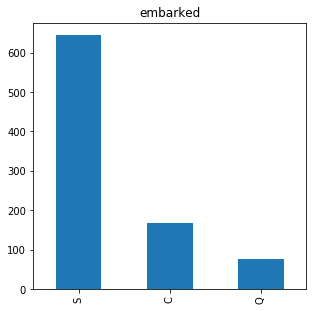

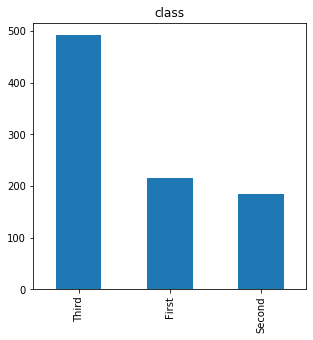

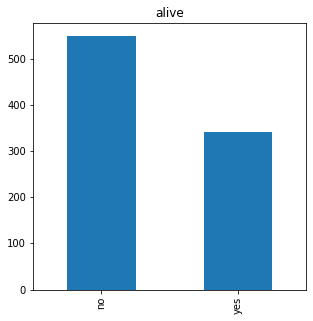

In [11]:
### 3. Univaraite Analysis ###

# bar chart and histogram
for column in df:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
 # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')



## Numerical vs. Numerical → heat map or pairplot

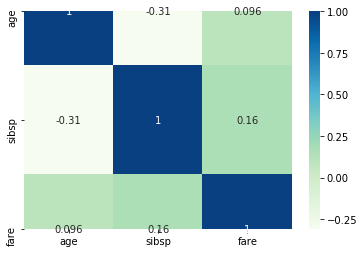

In [12]:
### 4. Multivariate Analysis ###

# correation matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


/Users/rsun/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rsun/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


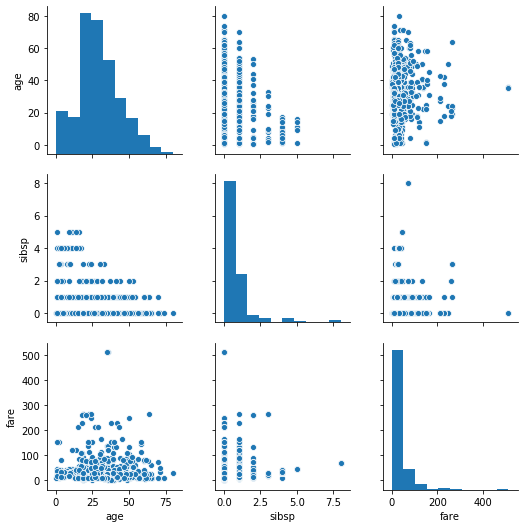

In [13]:

# pairplot
sns.pairplot(df,height = 2.5)


## Categorical vs. Categorical → countplot with hue

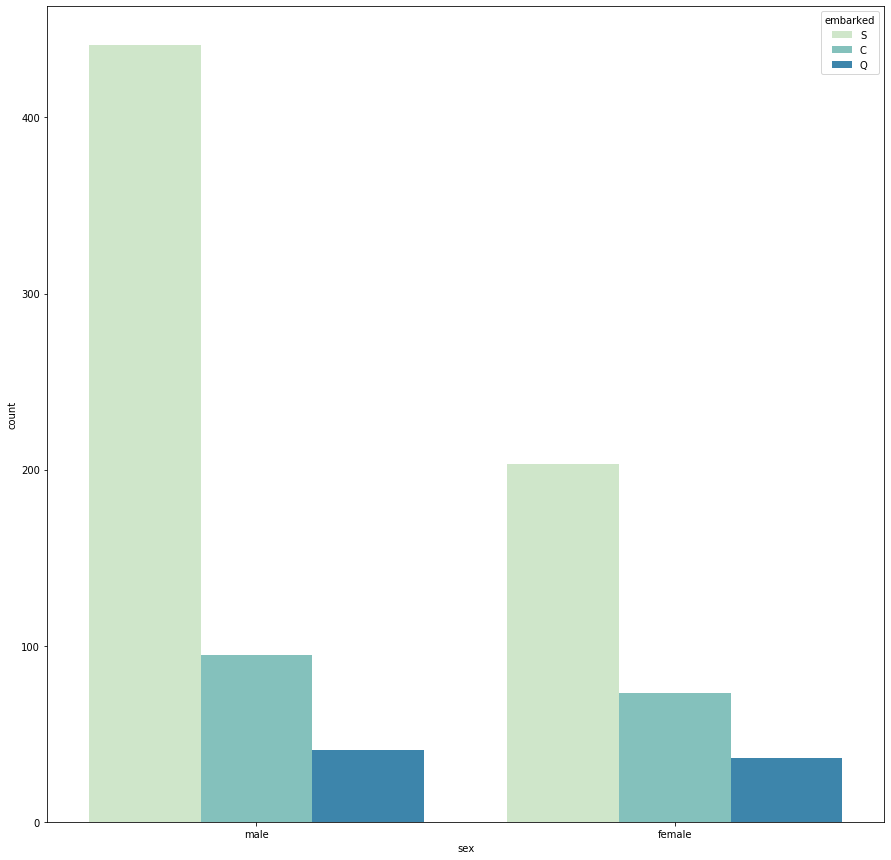

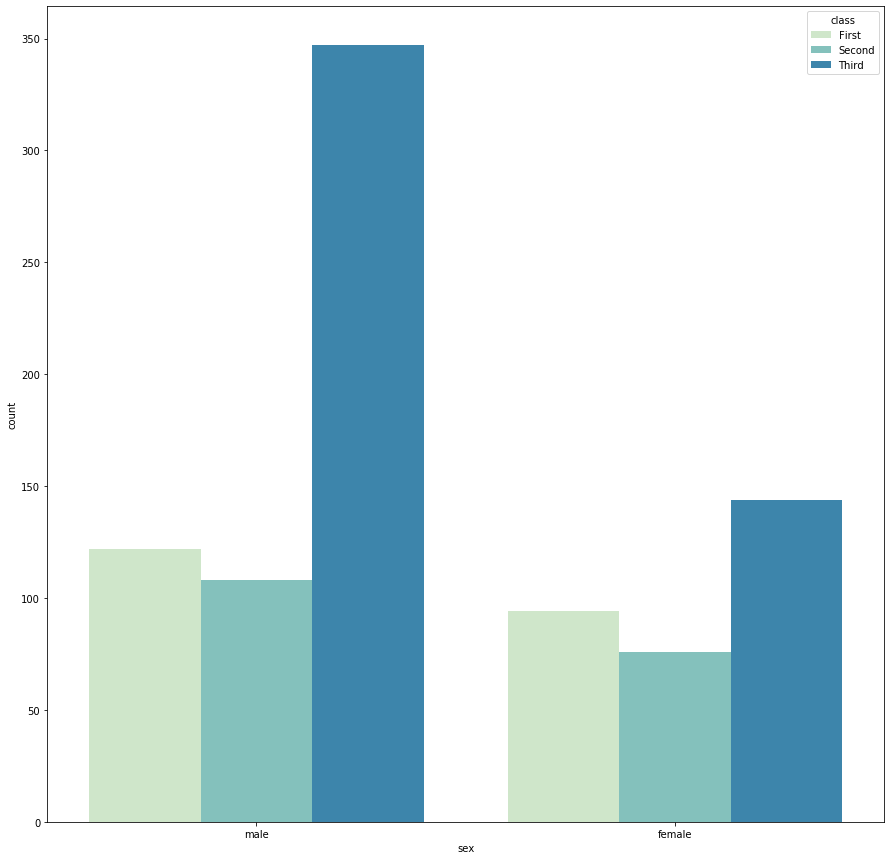

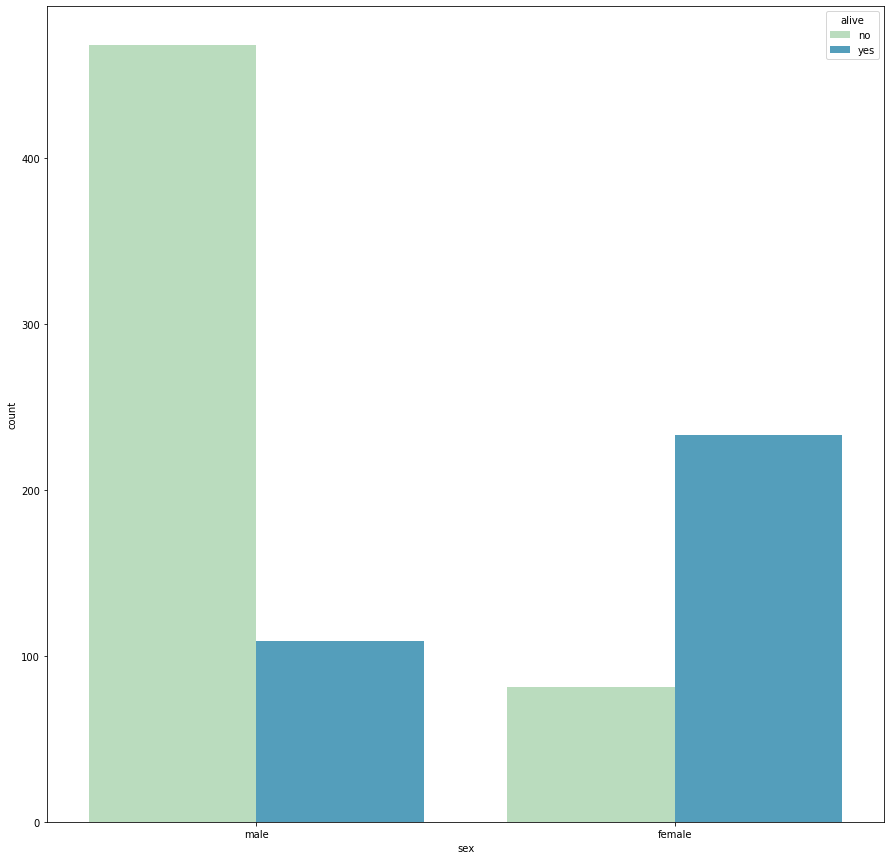

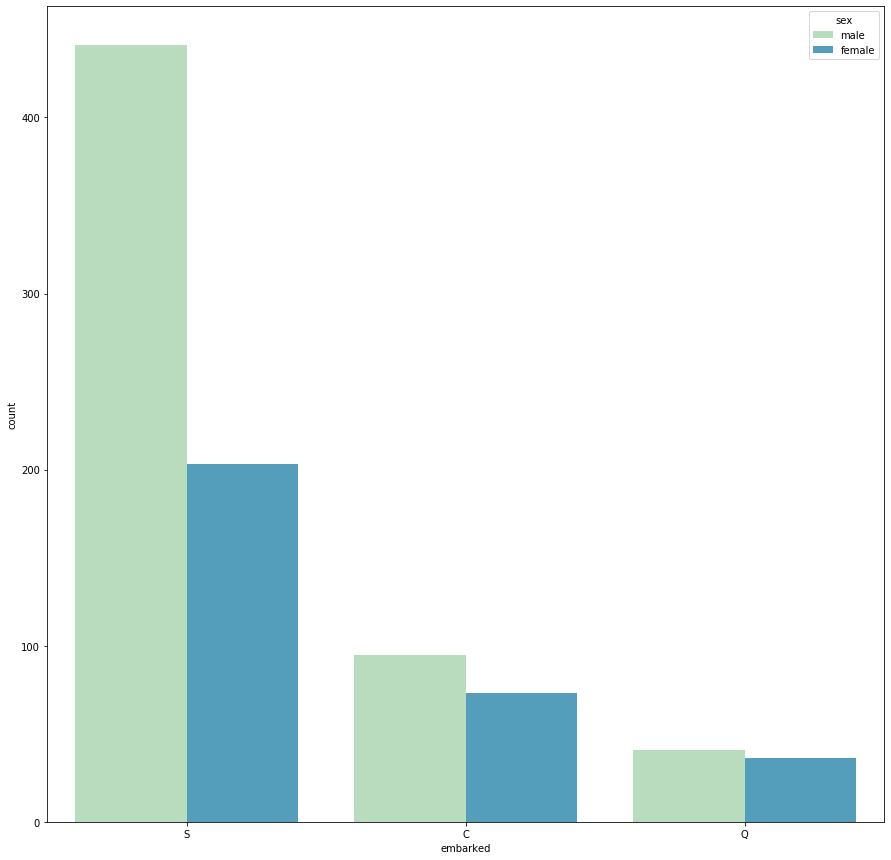

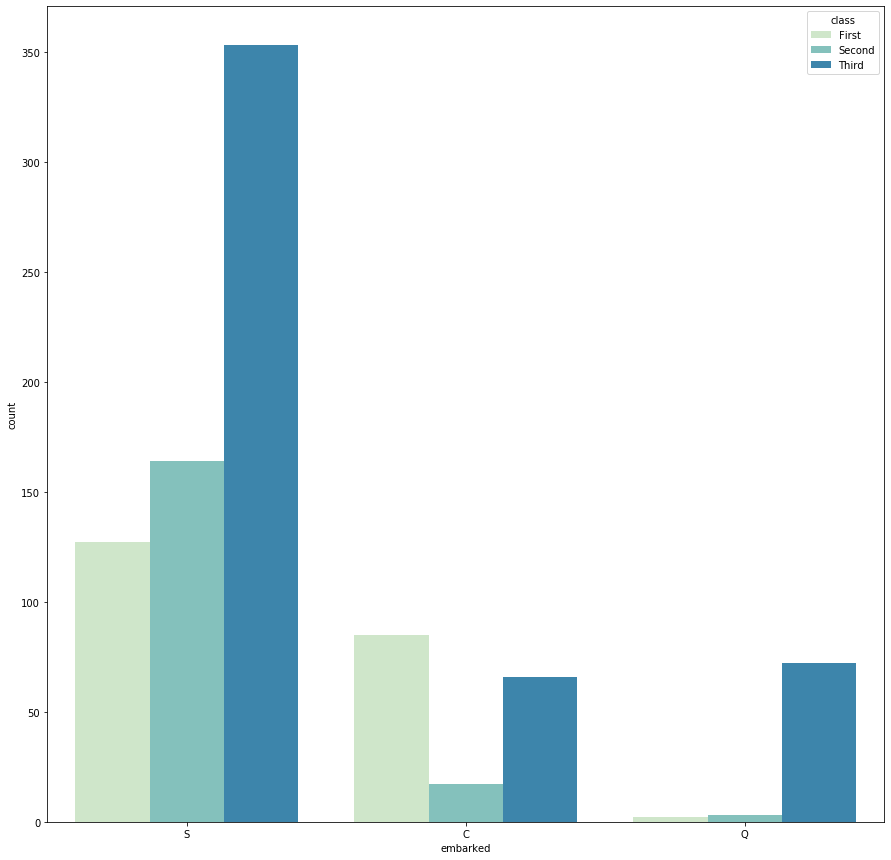

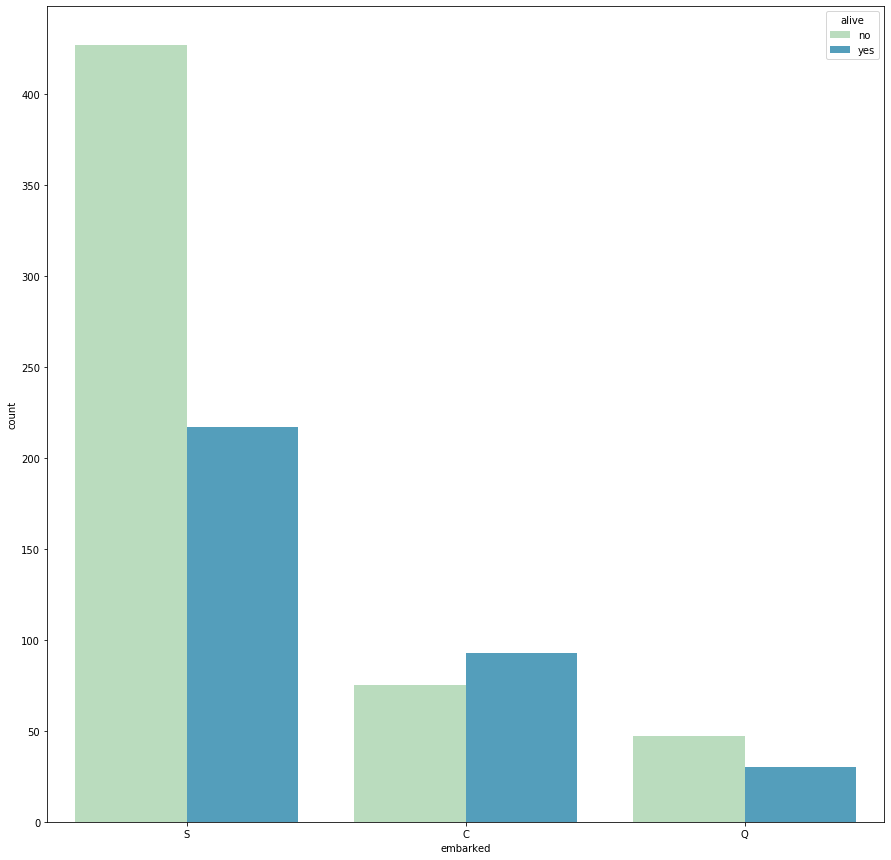

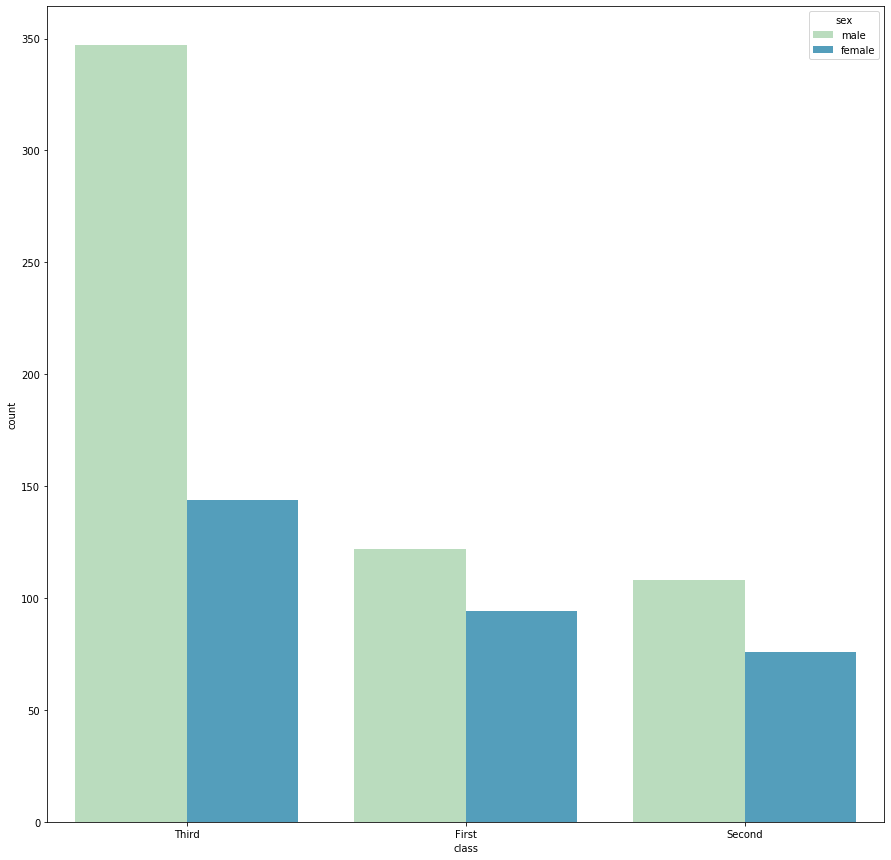

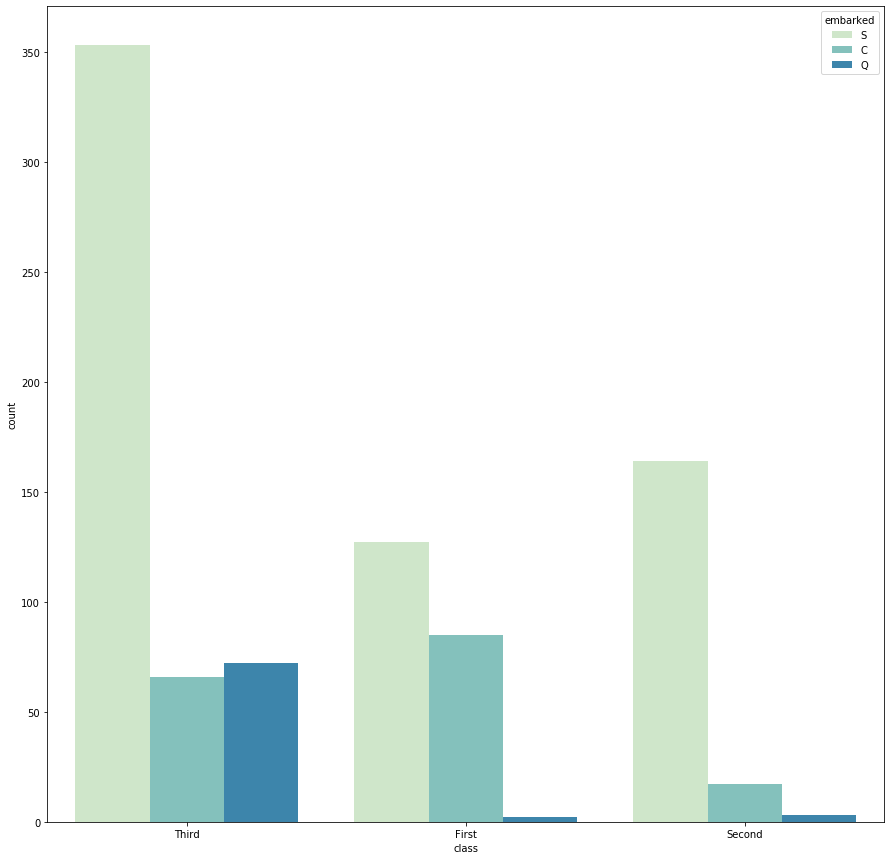

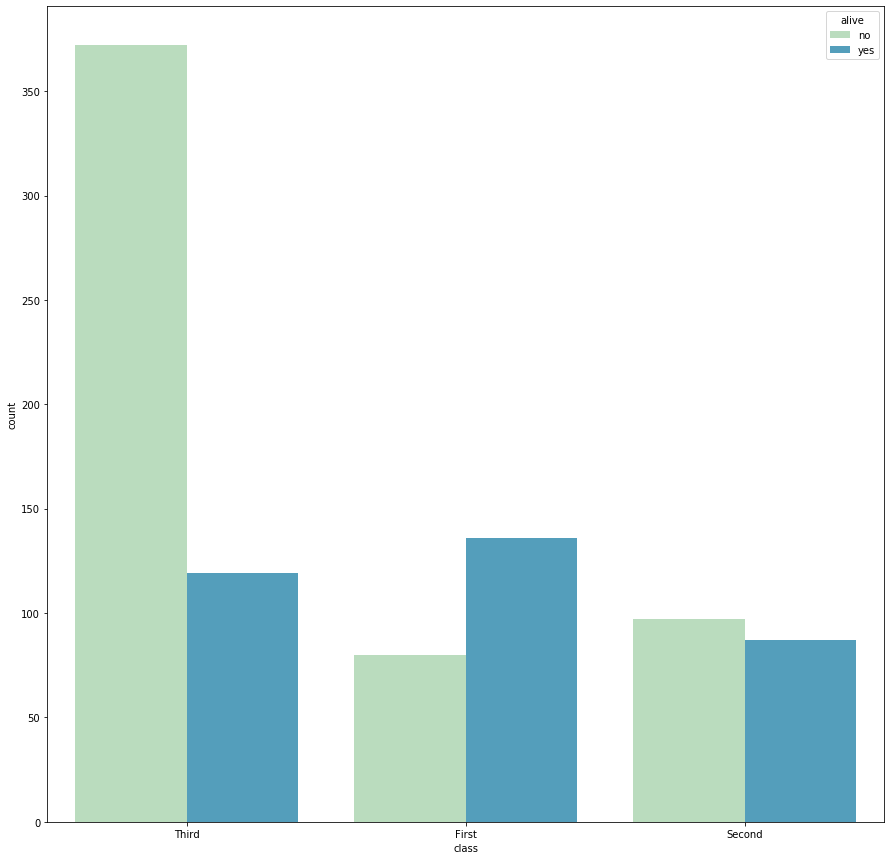

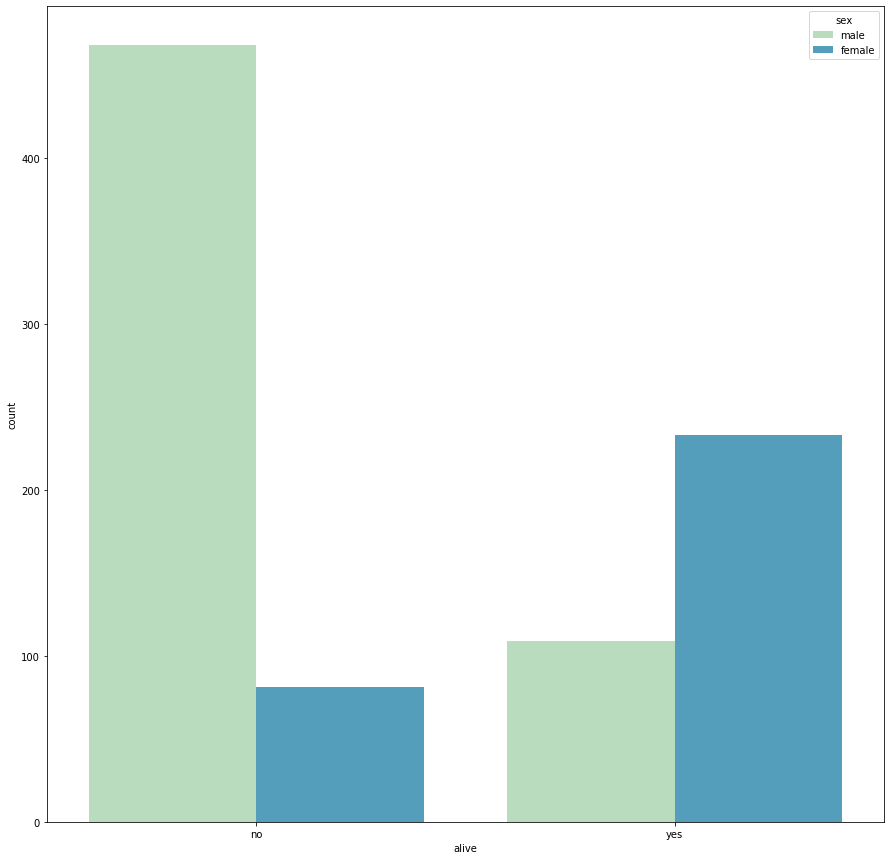

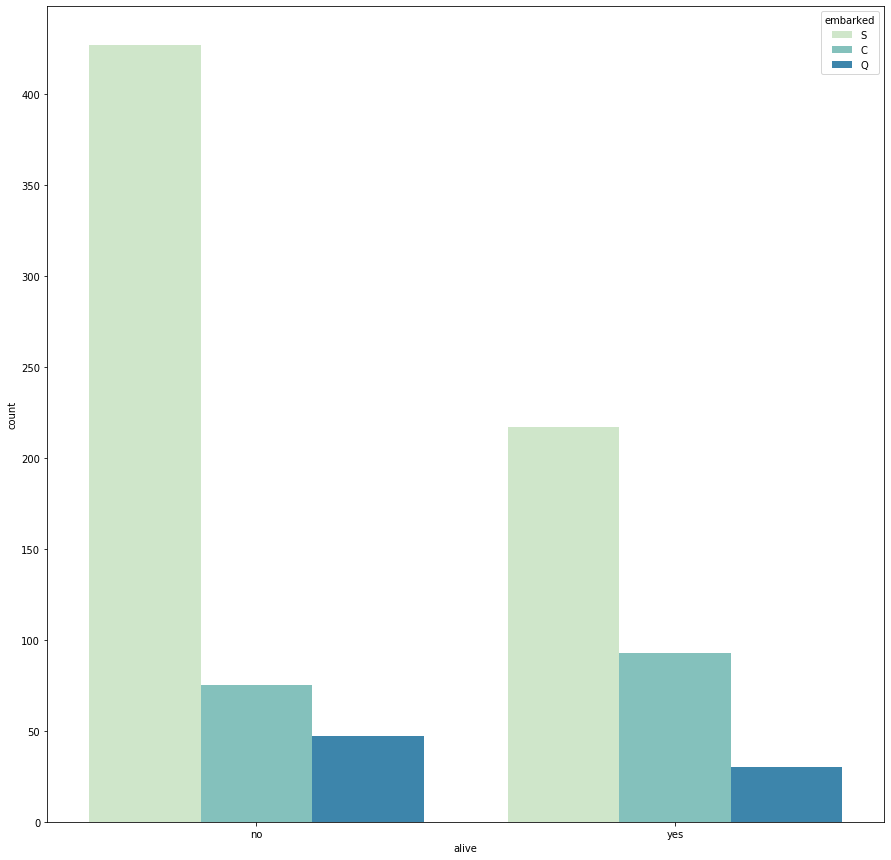

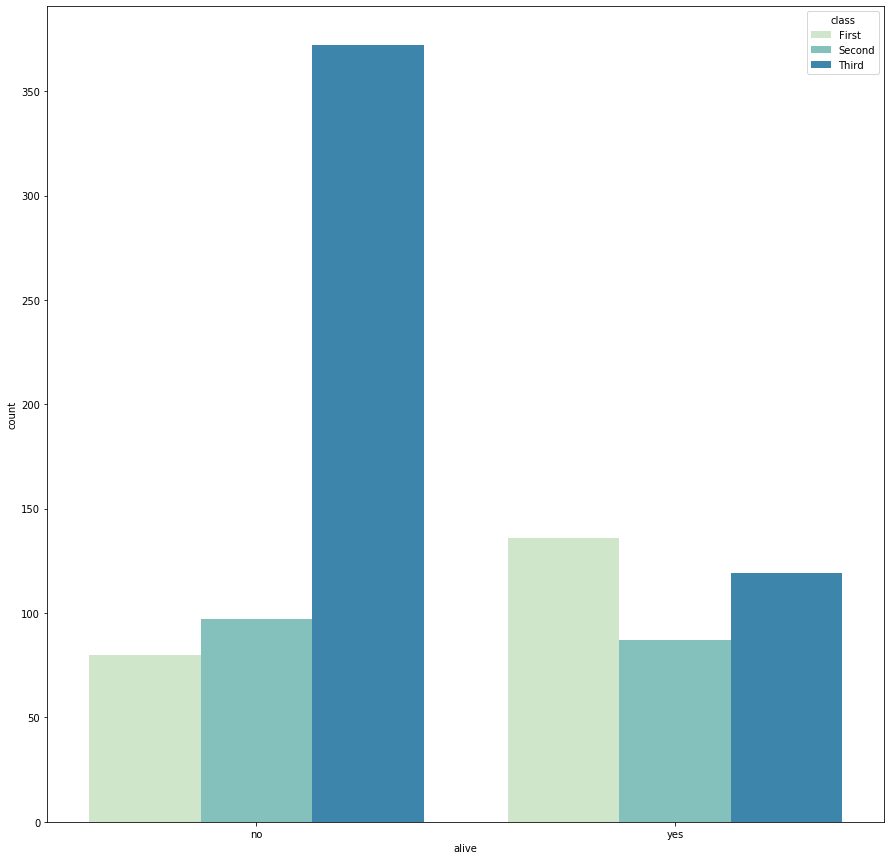

In [14]:

# grouped bar chart
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure (figsize = (15,15))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'GnBu',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
              )


Categorical vs. Numerical → boxplot or pairplot with hue

/Users/rsun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rsun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


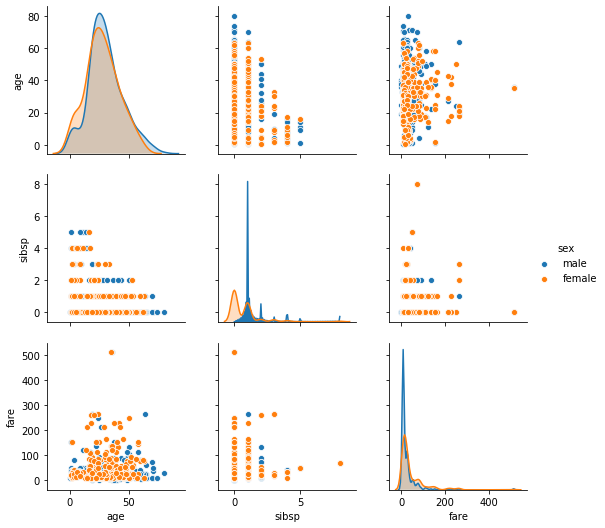

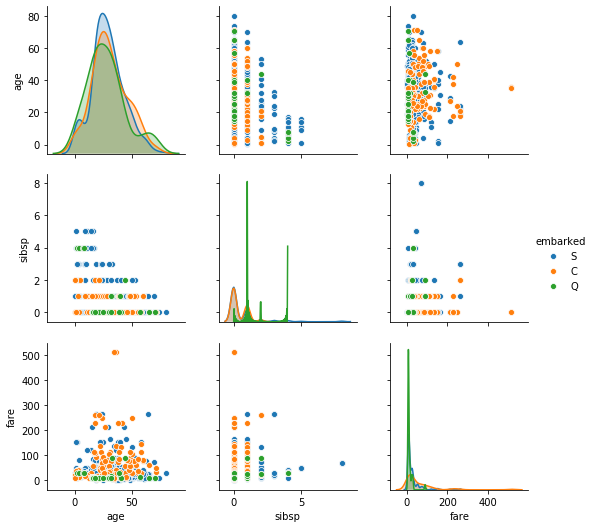

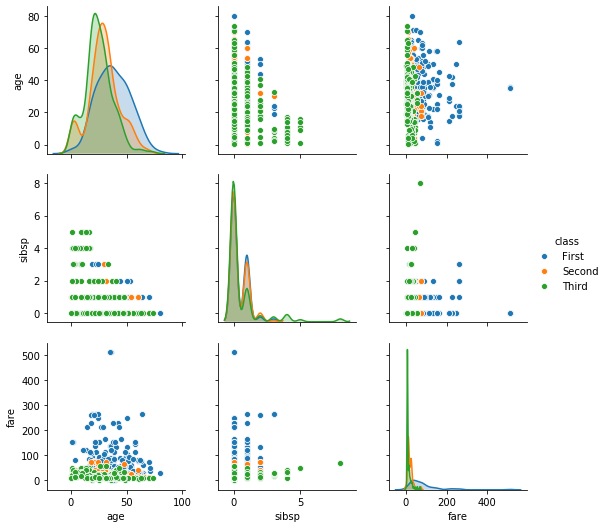

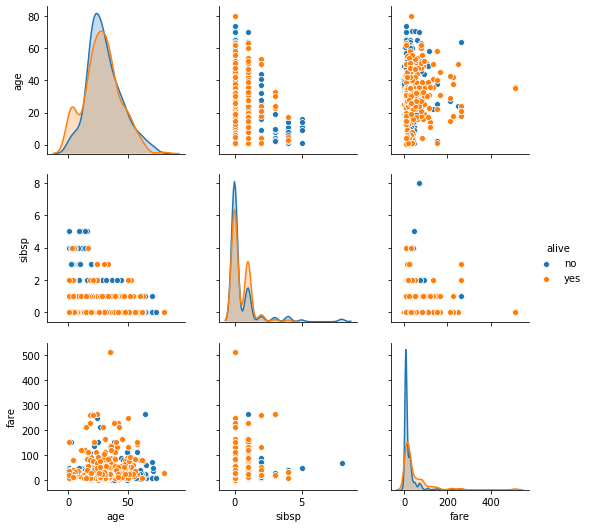

In [15]:

# pairplot with hue
for i in range(0, len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)


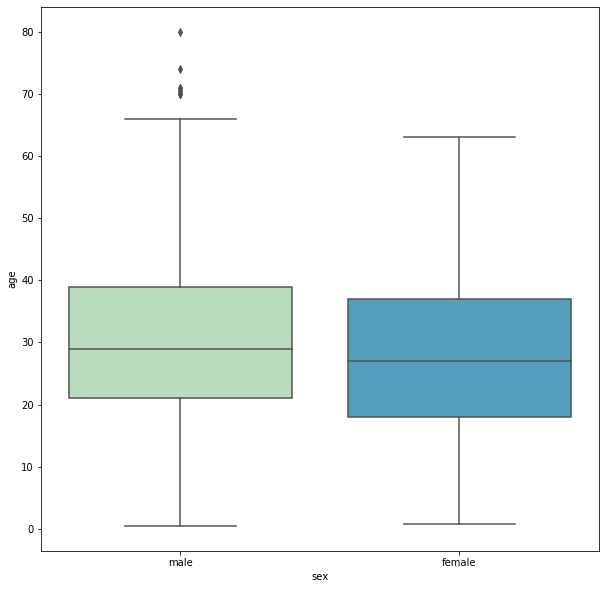

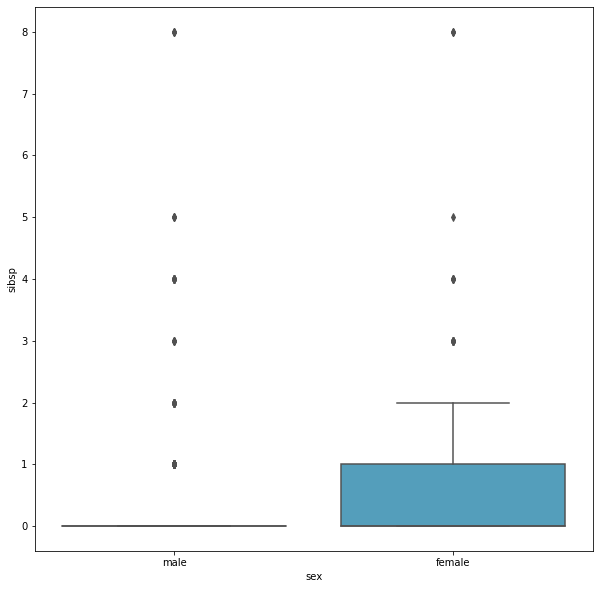

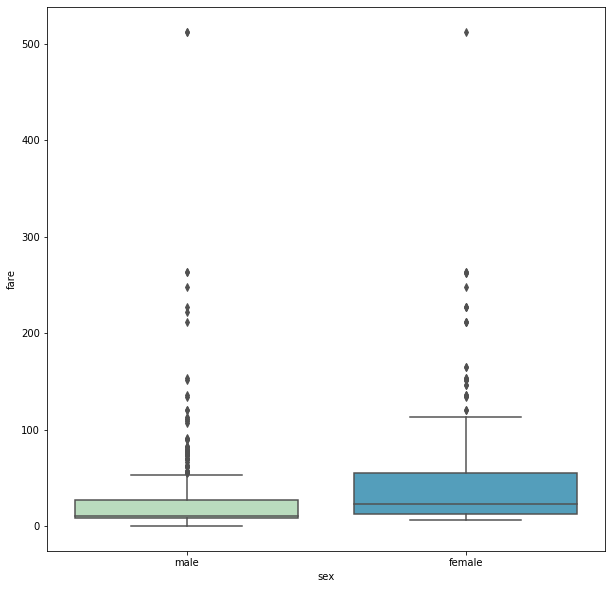

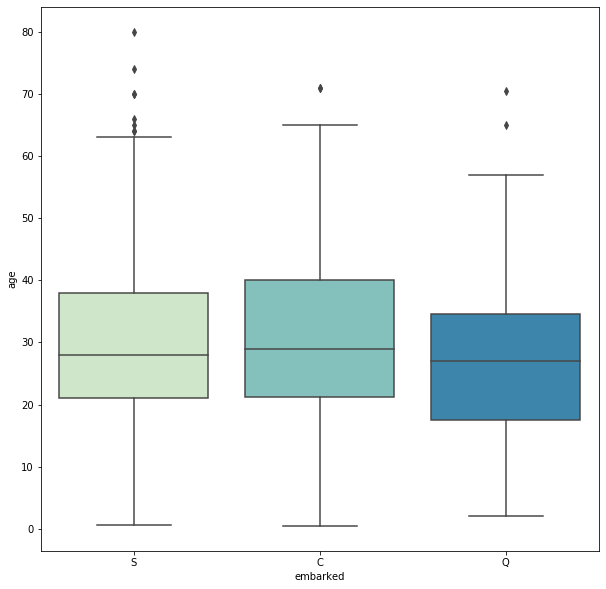

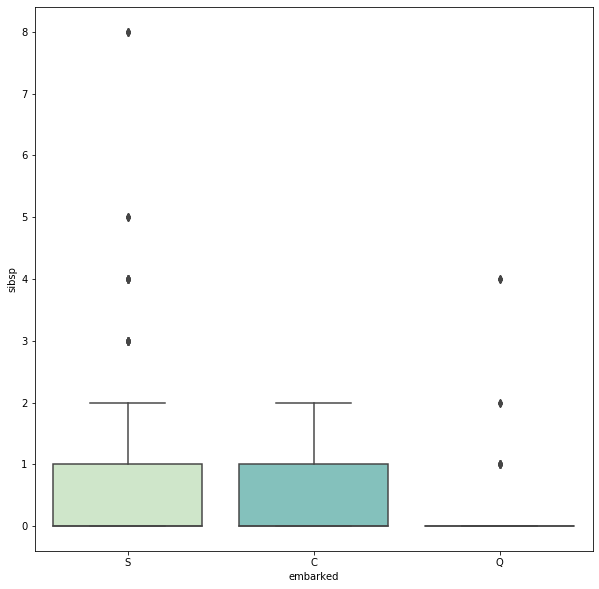

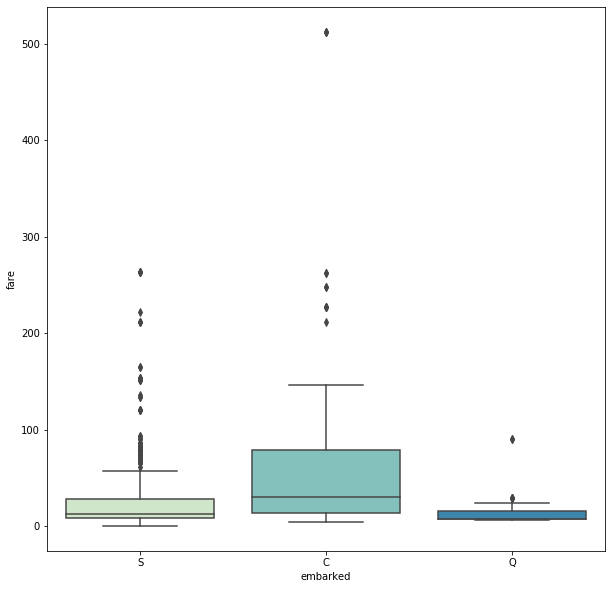

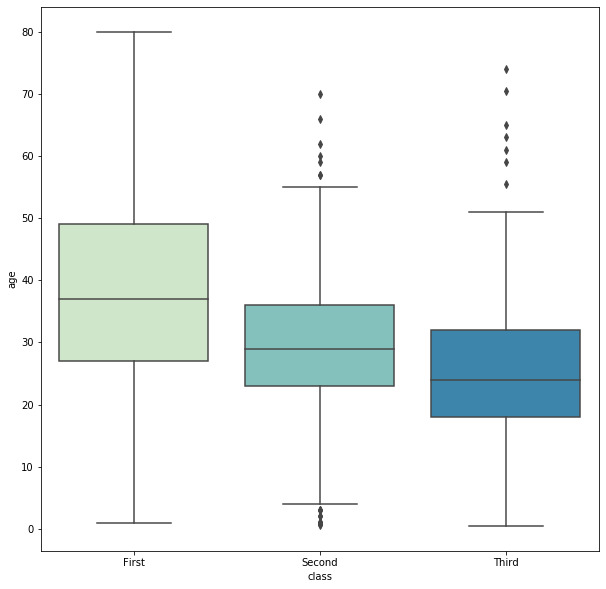

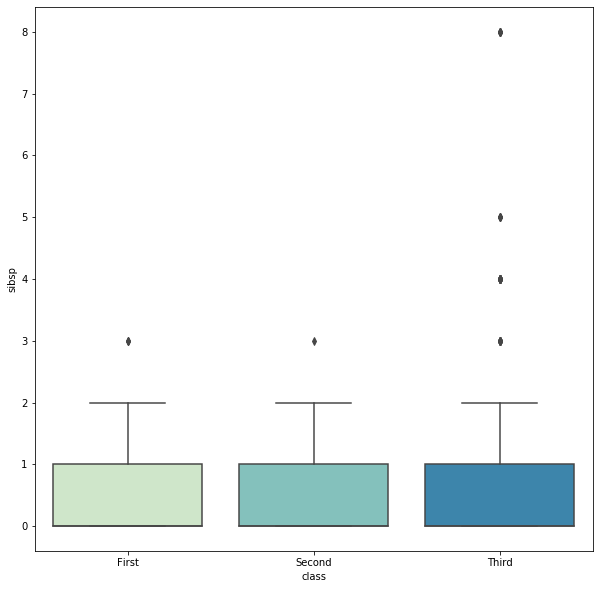

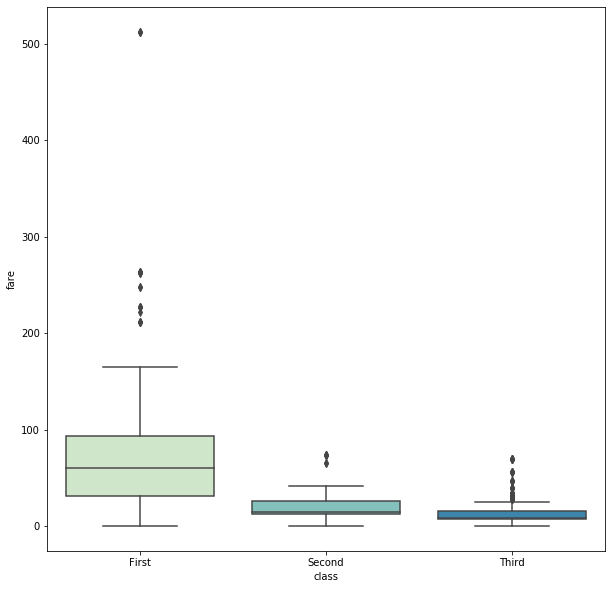

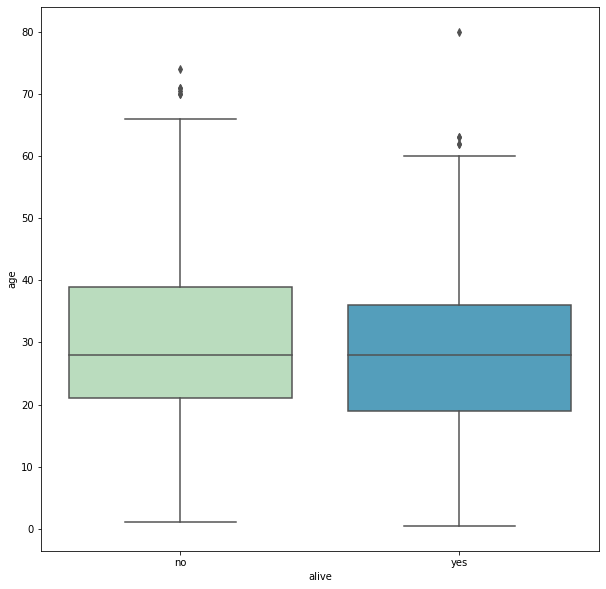

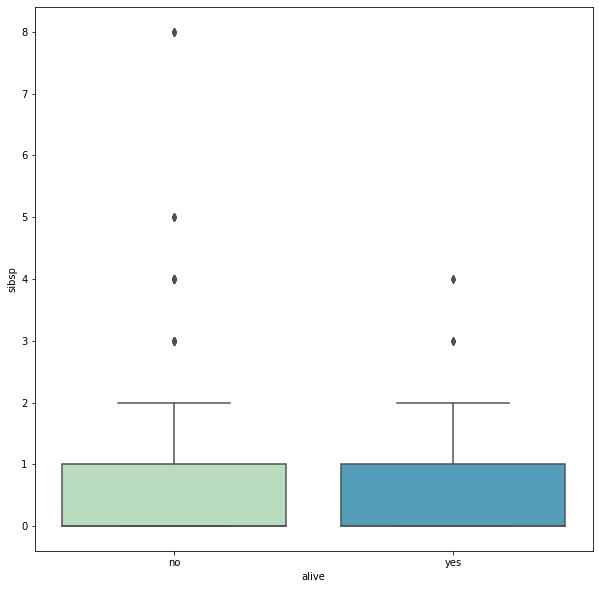

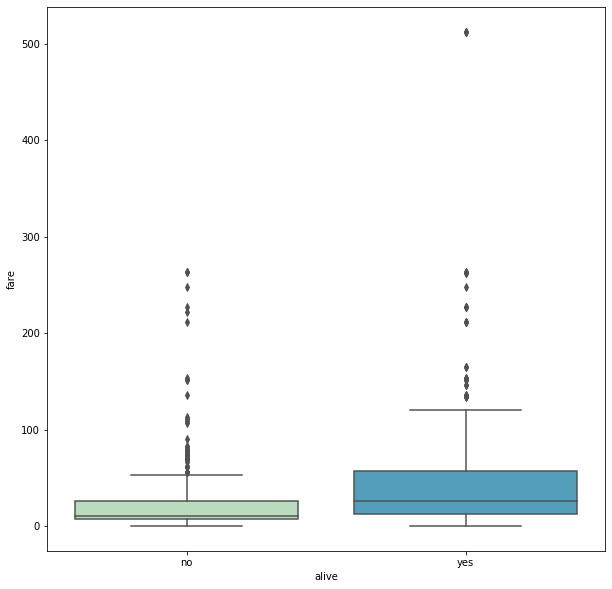

In [18]:

# box plot
for i in range(0, len(cat_list)):
    cat = cat_list[i]
    for j in range(0, len(num_list)):
            num = num_list[j]
            plt.figure (figsize = (10,10))
            sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")